# Income Qualification

## Project_02

In [1]:
# First Importing the required library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Removing the warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# importing the data set.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Some basic data exploration 

In [4]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
train_df.shape 

(9557, 143)

In [6]:
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [7]:
test_df.shape

(23856, 142)

### 1. Identification of the output variable 

In [8]:
# to know the output variable in the train data set we compare it from test data set
for i in train_df.columns:
    if i not in test_df.columns:
        print("Our output variable is the", i)

Our output variable is the Target


### 2. Understanding the type of the data 

In [9]:
train_df.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    Id               9557 non-null   object 
 1    v2a1             2697 non-null   float64
 2    hacdor           9557 non-null   int64  
 3    rooms            9557 non-null   int64  
 4    hacapo           9557 non-null   int64  
 5    v14a             9557 non-null   int64  
 6    refrig           9557 non-null   int64  
 7    v18q             9557 non-null   int64  
 8    v18q1            2215 non-null   float64
 9    r4h1             9557 non-null   int64  
 10   r4h2             9557 non-null   int64  
 11   r4h3             9557 non-null   int64  
 12   r4m1             9557 non-null   int64  
 13   r4m2             9557 non-null   int64  
 14   r4m3             9557 non-null   int64  
 15   r4t1             9557 non-null   int64  
 16   r4t2             9557 non-null   int64  

In [10]:
train_df.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

It is confirm from the above code that there is the three type of the data in dataset.
1. 130 variable is int type.
2. 8 variable is float type.
3. 5 variable is of object type.

### Data Cleaning steps 

In [12]:
train_df.select_dtypes("object")

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [13]:
# lets Convert the object variable into the int or float by converting Yes=1 and No=0 as given in the data dictionary.

'''101. dependency, Dependency rate, calculated = (number of members of the household
younger than 19 or older than 64)/(number of member of household between 19 and 64)

102. edjefe, years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

103. edjefa, years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0'''


'101. dependency, Dependency rate, calculated = (number of members of the household\nyounger than 19 or older than 64)/(number of member of household between 19 and 64)\n\n102. edjefe, years of education of male head of household, based on the interaction of\nescolari (years of education), head of household and gender, yes=1 and no=0\n\n103. edjefa, years of education of female head of household, based on the interaction of\nescolari (years of education), head of household and gender, yes=1 and no=0'

In [14]:
def change(i):
    if i == 'yes':
        return float(1)
    elif i == 'no':
        return float(0)
    else:
        return float(i)

In [15]:
train_df['dependency'] = train_df['dependency'].apply(change)

In [16]:
train_df['dependency'].dtypes

dtype('float64')

In [17]:
train_df['dependency']

0       0.00
1       8.00
2       8.00
3       1.00
4       1.00
        ... 
9552    0.25
9553    0.25
9554    0.25
9555    0.25
9556    0.25
Name: dependency, Length: 9557, dtype: float64

In [18]:
train_df['edjefe'] = train_df['edjefe'].apply(change)
train_df['edjefa'] = train_df['edjefa'].apply(change)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


### 3. To Check if there are any biases in our dataset.

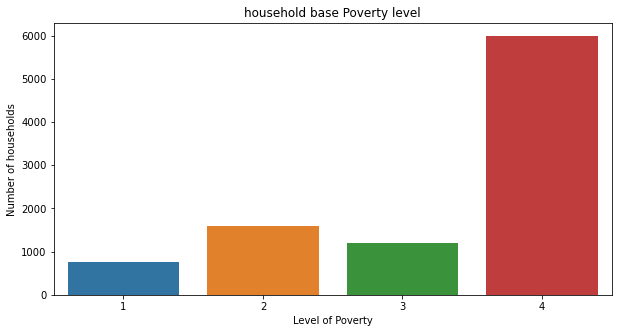

In [20]:
# With help of Target variables we check the biases in the data.
plt.figure(figsize=(10,5))
sns.countplot(x = 'Target', data=train_df)
plt.xlabel("Level of Poverty")
plt.ylabel("Number of households")
plt.title("household base Poverty level")
plt.show()

Poverty level is in the order as it is Categorised so we can say that our data is not biased.

### 4. To Check whether all members of the house have the same poverty level or not.

In [21]:
# Member of house with same poverty level.
same_level = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==True)

# Member of house that is not with same poverty level.
unequal_level = same_level[same_level != True]

In [22]:
same_level.value_counts()

True     2903
False      85
Name: Target, dtype: int64

In [23]:
unequal_level.value_counts()

False    85
Name: Target, dtype: int64

It's clear from the above value that there is 85 members of house do not have same poverty level.

### 5. To Check if there is a house without a family head.

In [24]:
# According to the data Dictionary ("parentesco1" =1 if household head).

In [25]:
household_head = train_df.groupby('idhogar')['parentesco1'].sum()
household_head

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [26]:
train_df['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [27]:
no_household_head = train_df.loc[train_df['idhogar'].isin(household_head[household_head==0].index),:]

In [28]:
no_head = no_household_head['idhogar'].nunique()

print("There is", no_head, "house without the family head.")

There is 15 house without the family head.


### 6. Set poverty level of the members and the head of the house within a family.

In [29]:
household_without_head_unequal_poverty = no_household_head.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1)

In [30]:
print("There are {} households without head have different Poverty Level or Target Value." .format(sum(household_without_head_unequal_poverty == False)))

There are 0 households without head have different Poverty Level or Target Value.


### 7. Count how many null values are existing in columns.

In [31]:
train_df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [32]:
data = {
  "feature_name": train_df.isnull().sum().index,
  "No.of null values": train_df.isnull().sum().values
}

In [33]:
null_values = pd.DataFrame(data)
null_values

,feature_name,No.of null values
0,Id,0
1,v2a1,6860
2,hacdor,0
3,rooms,0
4,hacapo,0
...,...,...
138,SQBovercrowding,0
139,SQBdependency,0
140,SQBmeaned,5
141,agesq,0


In [34]:
null_values[null_values['No.of null values']>0]

,feature_name,No.of null values
1,v2a1,6860
8,v18q1,7342
21,rez_esc,7928
103,meaneduc,5
140,SQBmeaned,5


### 8. Remove null value rows of the target variable.

In [35]:
# First Droping the column that not usefull.
train_df.drop(['Id','idhogar','rez_esc'], axis=1, inplace=True)

In [36]:
# Acc to data dictionary (tipovivi1, =1 own and fully paid house)            

In [37]:
train_df['tipovivi1'].value_counts()

1    5911
0    3646
Name: tipovivi1, dtype: int64

In [38]:
# Acc to data dictionary (v18q, owns a tablet)

In [39]:
train_df['v18q'].value_counts()

0    7342
1    2215
Name: v18q, dtype: int64

As in 'tipovivi1' feature 1 mean own house, there is no of 5911 is own house so That's there is no rent. So In feature 'v2a1' which show rent amount, so there all Nan value will be replace by 0.

As in 'v18q' feature 0 mean do not have own tablet, there is no of 7342 do not have own tablet. So In feature 'v18q1' which show no od tablet, so there all Nan means they has no tablets so that will be replace by 0.

In [40]:
train_df['v2a1'].fillna(value=0, inplace=True)
train_df['v18q1'].fillna(value=0, inplace=True)

In [41]:
train_df['meaneduc'].fillna(np.mean(train_df['meaneduc']),inplace=True)
train_df['SQBmeaned'].fillna(np.mean(train_df['SQBmeaned']), inplace=True)

In [42]:
train_df.isnull().sum().value_counts()

0    140
dtype: int64

In [43]:
train_df.info()  # Now There is neither null values nor any object variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 140 entries, v2a1 to Target
dtypes: float64(10), int64(130)
memory usage: 10.2 MB


### 9. Predict the accuracy using random forest classifier.

In [44]:
x_train_df = train_df.drop('Target', axis=1)

In [45]:
y_train_df = train_df['Target']

In [46]:
# First Split the data set in train test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.25, random_state=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [48]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rfc.predict(x_test)

In [51]:
# Checking the Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9175732217573221
[[ 139   11    0   33]
 [   8  346    6   50]
 [   1   18  221   64]
 [   0    4    2 1487]]
              precision    recall  f1-score   support

           1       0.94      0.76      0.84       183
           2       0.91      0.84      0.88       410
           3       0.97      0.73      0.83       304
           4       0.91      1.00      0.95      1493

    accuracy                           0.92      2390
   macro avg       0.93      0.83      0.87      2390
weighted avg       0.92      0.92      0.91      2390



### 10. To Check the accuracy using random forest with cross validation.

In [54]:
from sklearn.model_selection import cross_val_score, KFold

In [55]:
seed = np.random.seed(30)

In [56]:
kfold = KFold(n_splits=4, shuffle=True, random_state=seed)

In [58]:
print(cross_val_score(rfc, x_train_df, y_train_df, cv=kfold, scoring='accuracy'))

[0.91380753 0.90623692 0.91419004 0.91879447]


In [59]:
print(cross_val_score(rfc, x_train_df, y_train_df, cv=kfold, scoring='accuracy').mean())

0.9123145921596719


Now let's apply cleaning on the test data and do prediction for that.

In [63]:
# First Droping the column that not usefull.
test_df.drop(['Id','idhogar','rez_esc'], axis=1, inplace=True)

In [64]:
# Convert the object feature in float.
test_df['dependency'] = test_df['dependency'].apply(change)
test_df['edjefe'] = test_df['edjefe'].apply(change)
test_df['edjefa'] = test_df['edjefa'].apply(change)

In [65]:
# Now treating the Nan value in the data set.
test_df['v2a1'].fillna(value=0, inplace=True)
test_df['v18q1'].fillna(value=0, inplace=True)
test_df['meaneduc'].fillna(np.mean(test_df['meaneduc']),inplace=True)
test_df['SQBmeaned'].fillna(np.mean(test_df['SQBmeaned']), inplace=True)

In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 139 entries, v2a1 to agesq
dtypes: float64(10), int64(129)
memory usage: 25.3 MB


In [67]:
test_pred = rfc.predict(test_df)

In [68]:
test_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)